In [1]:
import faiss
exec(open("../database.py").read())
exec(open("../helperFunctions.py").read())
import numpy as np
from keras.datasets import mnist
from time import perf_counter
from ast import literal_eval

In [2]:
name = 'mnist-784'
runs = 1
metric = 'euclidean'
queries = 1000
nameFull = name + '-' + metric + '-true-labels.xlsx'
datasetTrainImages, datasetTestImages, _ = get_ann_benchmark_data(name)

d:\Учеба\Назарбаев Университет\Masters\raAndThesis\PavelBraslavski\annSearchComparisons/datasets/mnist-784.hdf5


<string>:91: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.


trainDataset :  (60000, 784)


<string>:92: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.


testDataset :  (10000, 784)


<string>:93: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.


***Create faiss***

In [3]:
def createIndex(indexMethod, datasetImages):
    d = datasetImages.shape[1] # dimension
    M = 16
    time_start = perf_counter()
    index = indexMethod(d, M)
    index.add(datasetImages) 
    time_end = perf_counter()
    totalTime = (time_end - time_start)
    print(f'Took {totalTime:.3f} seconds')
    return (index, totalTime)

In [4]:
(minBuildTime, maxBuildTime, indexedStruct) = createIndexNumerous(createIndex, faiss.IndexLSH, datasetTrainImages, runs)
print('minBuildTime : ', minBuildTime)
print('maxBuildTime : ', maxBuildTime)

Took 0.071 seconds
minBuildTime :  0.071
maxBuildTime :  0.071


In [7]:
indexes = []
distances = []
def measureTime(par, indexes, distances, datasetImages):
    k=100
    totalTime = 0
    for i in range(par) : 
        xq = datasetImages[i:i+1].astype('float32') # Use the first image as the query vector
        time_start = perf_counter()
        distance, index = indexedStruct.search(xq, k) 
        time_end = perf_counter()
        totalTime += (time_end - time_start)
        distances.append(np.sqrt(distance[0]))
        indexes.append(index[0])
    return np.round(totalTime, 3)

In [8]:
(minSearchTime, maxSearchTime, indexes, distances) = measureTimeNumerous(measureTime, runs, queries, datasetTestImages)
print('minSearchTime : ', minSearchTime)
print('maxSearchTime : ', maxSearchTime)

minSearchTime :  0.61
maxSearchTime :  0.61


In [9]:
indexes = np.array(indexes)
distances = np.round(np.array(distances).astype(float), 4)

In [10]:
print('indexes : ', indexes.shape)
print('distances : ', distances.shape)

indexes :  (1000, 100)
distances :  (1000, 100)


In [11]:
path = '../datasets/'+nameFull
(trueIndexes, trueDistances) = readDB(path)

trueIndexes :  (1000, 100)
trueDistances :  (1000, 100)


In [12]:
amount = 10
compareElems(amount, indexes, distances, trueIndexes, trueDistances)

21658 || 53843
0.0 || 676.584
928 || 38620
1.0 || 793.9868
1332 || 16186
1.0 || 862.6766
3298 || 27059
1.0 || 864.5039
3309 || 47003
1.0 || 894.7
4130 || 14563
1.0 || 909.7043
6915 || 44566
1.0 || 917.6323
8198 || 15260
1.0 || 921.6241
9454 || 40368
1.0 || 922.147
12281 || 36395
1.0 || 943.4972


index :  21658 
distance :  0.0
index :  928 
distance :  1.0
index :  1332 
distance :  1.0
index :  3298 
distance :  1.0
index :  3309 
distance :  1.0
index :  4130 
distance :  1.0
index :  6915 
distance :  1.0
index :  8198 
distance :  1.0
index :  9454 
distance :  1.0
index :  12281 
distance :  1.0


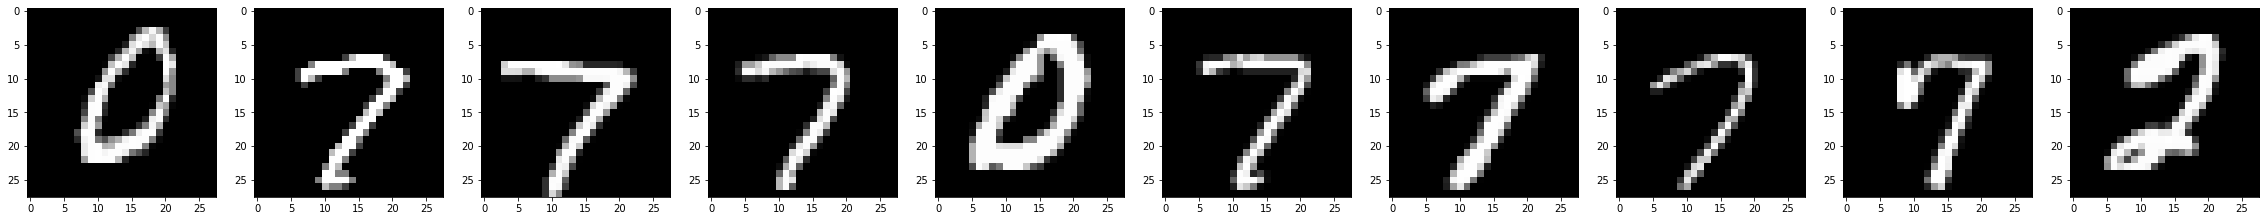

In [14]:
draw_mnist(indexes, distances, datasetTrainImages)

In [13]:
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances)
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances, 1.01)
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances, 1.1)

Recall@1: 1.0000
Recall@1.01: 1.0000
Recall@1.1: 1.0000


1.0